In [1]:
import random
import string
import abc
import sys
from datetime import datetime
from models import *
from functions import *


d:\AQUI\banking-system-emulator\flask-app\app


In [2]:
rand_str = lambda l : rand_str(l-1)+random.choice(string.ascii_lowercase) if l > 1 else random.choice(string.ascii_lowercase)
rand_str(10)

&#39;vwhsdkqfvq&#39;

In [3]:
import pandas as pd

In [4]:
Client.change_client(id = '7-589-631', client_name= 'Susana Castillo')

ERROR


In [5]:
PRODUCTS = (SavingAccount,FixedTermDeposit,Loan,CreditCard)

### FUNCIONES

In [6]:
prueba = lambda s: s if (len(df_transactions[df_transactions['id']==s])) == 0 else prueba(random.choice(range(100000,999999)))

In [7]:

def generate_product_ids():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000000,9999999)))
  product_ids.append(id)
  return id   


In [8]:

def generate_credit_card_number():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))
  product_ids.append(id)
  return id   


In [9]:

def generate_transaction_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(100000,9999999)))
  transaction_ids.append(id)
  return id   


In [10]:

def generate_client_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1,11)))+"-"+ str(random.choice(range(100,999)))+"-"+ str(random.choice(range(1,999)))
  ids.append(id)
  return id   


In [11]:
def generate_saving_accounts(n):
  accs = []
  for i in range(n):
    accs.append(SavingAccount(
        id = generate_product_ids()
    ))
  return accs

In [12]:
def generate_clients(n):
  clients = []
  for i in range(n):
    clients.append(Client(
        id = generate_client_id(),
        name = rand_str(10) +" "+rand_str(15),
        products = []
    ))
  return clients


In [13]:
def generate_balance():
  n = random.choice(range(0,500000))
  cash= ("${:5.2f}".format(n))
  return cash

## Generar Entidades

In [32]:
%%time
ids = []
product_ids = []
clientes = generate_clients(1000)
products = []

# POR CADA PRODUCTO GENERADO...
for cliente in clientes:
  # SELECCIONO UNA CANTIDAD DE PRODUCTOS ALEATORIAMENTE
  cantidad_productos = random.choice(range(1,5))
  
  # POR LA CANTIDAD DE PRODUCTOS SELECCIONADOS...
  for p in range(0,cantidad_productos):    

    # SELECCIONO ALEATORIAMENTE UN TIPO DE PRODUCTO
    tipo_producto = PRODUCTS[random.choice(range(0,len(PRODUCTS)))]

    month = random.choice(range(1,13))
    # SI EL MES ES FEBRERO... ENTRE 1 Y 28
    if month == 2: day = random.choice(range(1,29))
    # SI EL MES ES PAR EN EL SEGUNDO SEMESTRE O ES IMPAR EN EL PRIMER SEMESTRE... ENTRE 1 Y 31
    elif (month % 2 == 0 and month >= 8) or (month % 2 != 0 and month < 8): day = random.choice(range(1,32))
    # DE CUALQUIER OTRA FORMA... ENTRE 1 Y 30
    else: day = random.choice(range(1,30))

    # INSTANCIO EL PRODUCTO
    if tipo_producto is Loan:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(3,17)),
          owner = cliente.id,
          base= random.choice([365,360]),
          length = random.choice(range(1,120)),
          From = datetime(random.choice(range(2018,2020+1)),month ,day))
    elif tipo_producto is CreditCard:
      producto = tipo_producto(
          id=generate_credit_card_number(),
          interest_rate=random.choice(range(1,3)),
          owner = cliente.id
          )
    else:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(1,3)),
          balance = random.choice(range(1,500000)),
          owner = cliente.id
          )
 
    # RELACIONO EL PRODUCTO CON EL CLIENTE ACTUAL
    cliente.products.append(producto)
    products.append(producto)
print(type (tipo_producto.balance))

print("Productos generados:",len(products))
print("Clientes generados:",len(clientes))

AttributeError: module &#39;random&#39; has no attribute &#39;choiche&#39;

In [15]:
products[0].owner

&#39;5-444-359&#39;

## Generar transacciones

In [16]:
%%time
MIN_TRX = 10
MAX_TRX = 100
transactions = []
transaction_ids = []



for cliente in clientes:
  for producto in cliente.products:
    
    if type(producto) is SavingAccount or type(producto) is FixedTermDeposit :
      # SELECCIONAR UN NUMERO ALEATORIO DE TRANSACCIONES PARA CADA PRODUCTO
      n_Trx = random.choice(range(MIN_TRX,MAX_TRX))

      for trx in range(n_Trx):
        month = random.choice(range(1,13))
        # SI EL MES ES FEBRERO... ENTRE 1 Y 28
        if month == 2: day = random.choice(range(1,29))
        # SI EL MES ES PAR EN EL SEGUNDO SEMESTRE O ES IMPAR EN EL PRIMER SEMESTRE... ENTRE 1 Y 31
        elif (month % 2 == 0 and month >= 8) or (month % 2 != 0 and month < 8): day = random.choice(range(1,32))
        # DE CUALQUIER OTRA FORMA... ENTRE 1 Y 30
        else: day = random.choice(range(1,30))
        amt = float(str(random.choice(range(1,999999999)))+"."+str(random.choice(range(1,99))))
        nature = "Dr" if random.choice(range(10))==0 else "Cr"
        mvt = amt*-1 if nature == 'Dr' else amt
        transactions.append(Transaction(
            id = generate_transaction_id(),
            product = producto.id,
            nature = nature,
            date = datetime(random.choice(range(2010,2020+1)),month ,day),
            amt = amt,
            mvt = mvt
        ))

print("Transacciones generadas:",len(transactions))
print("Media de transacción por cliente:",len(transactions)/len(products))

Transacciones generadas: 65762
Media de transacción por cliente: 27.343866943866942
Wall time: 4.24 s


## Generar tablas

In [29]:
df_loans =[]
df_deposits = []
df_CreditCards = []
for p in products:
  if type(p) is Loan:
    df_loans.append(p)
  if type(p) is FixedTermDeposit or type(p) is SavingAccount:
    df_deposits.append(p)
  if type(p) is CreditCard:
    df_CreditCards.append(p)



In [19]:
df_CreditCards = pd.DataFrame.from_records([j.to_dict() for j in df_CreditCards])
df_CreditCards.head(3)

,id,interest_rate,balance,owner,type
0,7026312014203859,1,0.0,5-444-359,CreditCard
1,3891512475179497,1,0.0,5-293-852,CreditCard
2,2242230536271602,1,0.0,10-860-560,CreditCard


In [20]:
df_clients = pd.DataFrame.from_records([l.to_dict() for l in clientes])
df_clients.head(3)

,id,client_name
0,5-444-359,axrfqcevrs fxbxaphruwjixuu
1,6-155-413,hfvnljulkw mqlhzbqxsietuvr
2,5-293-852,webylmwevz fkpgxjsanggatgr


In [21]:
df_loans = pd.DataFrame.from_records([l.to_dict() for l in df_loans])
df_loans.head(3)

,id,interest_rate,balance,owner,type,length,base,From
0,4054520,7,0.0,5-444-359,Loan,66,360,2019-11-21
1,7019408,7,0.0,8-957-172,Loan,96,365,2018-04-24
2,4466187,12,0.0,8-957-172,Loan,39,365,2018-07-17


In [30]:
df_deposits = pd.DataFrame.from_records([d.to_dict() for d in df_deposits])
df_deposits.head(3)

,id,interest_rate,balance,owner,type
0,6901005,1,0.0,5-444-359,FixedTermDeposit
1,2361806,2,0.0,5-444-359,FixedTermDeposit
2,6420078,1,0.0,6-155-413,SavingAccount


In [25]:
df_transactions = pd.DataFrame.from_records([t.to_dict() for t in transactions])
df_transactions.to_csv("db/transactions.csv")
df_transactions


,id,nature,accounting_date,amount,product,mvt
0,7965550,Cr,2016-06-07,5.568899e+08,5252856,5.568899e+08
1,1957913,Cr,2015-02-03,8.793814e+08,5252856,8.793814e+08
2,2676035,Dr,2020-12-17,5.854990e+08,5252856,-5.854990e+08
3,6362909,Cr,2012-06-25,7.134613e+08,5252856,7.134613e+08
4,3567704,Cr,2018-08-11,5.632074e+08,5252856,5.632074e+08
...,...,...,...,...,...,...
70151,451455,Cr,2020-12-03,3.221607e+08,9782966,3.221607e+08
70152,7368042,Cr,2017-03-04,8.308256e+08,9782966,8.308256e+08
70153,8313226,Cr,2013-12-08,4.096165e+07,9782966,4.096165e+07
70154,6976648,Cr,2017-08-19,9.745976e+08,9782966,9.745976e+08


In [28]:
df_transactions[df_transactions['product']=='1022920']
summarize = df_transactions.groupby(['product'])['mvt']
summarize = summarize.sum()
summarize = summarize.reset_index()
#print(summarize['1022920'==summarize['product']])
for i in range(len(summarize)):
  product_id = summarize['product'].iloc[i]
  
  df_deposits.loc[df_deposits['id']==product_id,'balance'] = summarize['mvt']

df_deposits[df_deposits['id'].isin(summarize['product'])]
#print(df_deposits[summarize['product']==df_deposits['id']])

ValueError: Must have equal len keys and value when setting with an iterable

## Requerimientos


***vas a definir la funcion de ejecutar transferencia***



***tienes que buscar la informacion de las cuentas afectadas en la tabla de productos***


***vas a ver si la cuenta a acreditar tiene saldo***


vas a generar la transaccion en la tabla de transacciones


vas a modificar el balance de las cuentas afectadas en la tabla de productos



### Generar estado de cuenta

In [26]:
def getAccountStatement(**kwargs):
  
  try: kwargs['product']
  except: print("A product id is required")

  
  print("Getting account statement for product",kwargs['product'])
  df = df_transactions[df_transactions['product'] == kwargs['product']]
  
  try: start = kwargs['start'] 
  except: start = df['accounting_date'].min()
  try: end = kwargs['end']
  except: end = df['accounting_date'].max()
  
  df = df[(df.accounting_date >= start) & (df.accounting_date <= end) ]

  print("Found",len(df),"transactions from",start,"to",end)
  df = df.sort_values(by=['accounting_date'])
  df = df.reset_index()
  df = df.drop(['index'],axis=1)
  return df

In [27]:
%%time
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
print(account_stmnt)


Getting account statement for product 1530414
Found 59 transactions from 2010-01-13 00:00:00 to 2020-11-23 00:00:00
         id nature accounting_date        amount  product           mvt
0   1803886     Dr      2010-01-13  8.706350e+08  1530414 -8.706350e+08
1   2572823     Cr      2010-02-15  3.964395e+08  1530414  3.964395e+08
2   4827171     Cr      2010-04-11  1.173243e+08  1530414  1.173243e+08
3   1068506     Cr      2010-07-06  8.750503e+08  1530414  8.750503e+08
4   7103953     Cr      2010-08-09  7.358630e+08  1530414  7.358630e+08
5   1628209     Cr      2010-11-07  4.748835e+08  1530414  4.748835e+08
6   8604327     Cr      2010-11-25  7.231608e+07  1530414  7.231608e+07
7   6632952     Cr      2010-12-05  9.626099e+08  1530414  9.626099e+08
8   2149501     Cr      2011-02-06  1.774742e+08  1530414  1.774742e+08
9   2548092     Cr      2011-02-28  5.122257e+08  1530414  5.122257e+08
10  5718117     Cr      2011-03-07  4.963063e+08  1530414  4.963063e+08
11  5838132     Cr  

#### Mostrar un gráfico con el movimiento de su producto

In [28]:
import matplotlib.pyplot as plt

In [29]:
# generar el campo valor
account_stmnt['mvt'] = 0.00
account_stmnt.loc[account_stmnt['nature']=="Dr",'mvt'] = account_stmnt['amount']
account_stmnt.loc[account_stmnt['nature']=="Cr",'mvt'] = account_stmnt['amount']*-1
account_stmnt.sum()

id         1803886257282348271711068506710395316282098604...
nature     DrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrDr...
amount                                            3.0349e+10
product    1530414153041415304141530414153041415304141530...
mvt                                             -2.31419e+10
dtype: object

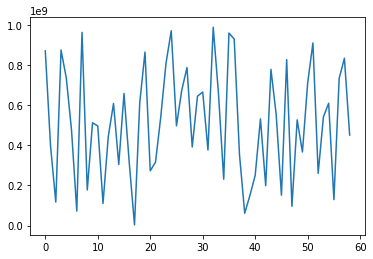

In [30]:
plt.plot(account_stmnt.amount)
plt.show()

### Ejecutar Transferencia

In [31]:
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
account_stmnt

Getting account statement for product 1530414
Found 59 transactions from 2010-01-13 00:00:00 to 2020-11-23 00:00:00


,id,nature,accounting_date,amount,product,mvt
0,1803886,Dr,2010-01-13,8.706350e+08,1530414,-8.706350e+08
1,2572823,Cr,2010-02-15,3.964395e+08,1530414,3.964395e+08
2,4827171,Cr,2010-04-11,1.173243e+08,1530414,1.173243e+08
3,1068506,Cr,2010-07-06,8.750503e+08,1530414,8.750503e+08
4,7103953,Cr,2010-08-09,7.358630e+08,1530414,7.358630e+08
5,1628209,Cr,2010-11-07,4.748835e+08,1530414,4.748835e+08
6,8604327,Cr,2010-11-25,7.231608e+07,1530414,7.231608e+07
7,6632952,Cr,2010-12-05,9.626099e+08,1530414,9.626099e+08
8,2149501,Cr,2011-02-06,1.774742e+08,1530414,1.774742e+08
9,2548092,Cr,2011-02-28,5.122257e+08,1530414,5.122257e+08


### Generar tablas

In [27]:
df_deposits.to_csv("db/deposits.csv")
df_loans.to_csv("db/loans.csv")
df_transactions.to_csv("db/transactions.csv")
df_clients.to_csv("db/clients.csv")
df_CreditCards.to_csv("db/CreditCards.csv")


## Pruebas

In [33]:
deposits = pd.read_csv("db/deposits.csv")
loans = pd.read_csv("db/loans.csv")

dep2 = deposits[deposits.owner == '6-832-434']
loans2 = loans[loans.owner == '6-832-434']
print(dep2)
client_products = []
for i in range(len(dep2)):
    #print(dep2.iloc[i].type)
    if eval(dep2.iloc[i].type) == SavingAccount:
        client_products.append(SavingAccount(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
    if eval(dep2.iloc[i].type) == FixedTermDeposit:
        client_products.append(FixedTermDeposit(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
for i in range(len(loans2)):

    client_products.append(Loan(
            id = str(loans2.iloc[i].id),
            interest_rate = loans2.iloc[i].interest_rate,
            balance = float(loans2.iloc[i].balance),
            owner = loans2.iloc[i].owner,
            length = loans2.iloc[i].length,
            base = loans2.iloc[i].base
        ))


Empty DataFrame
Columns: [Unnamed: 0, id, interest_rate, balance, owner, type]
Index: []


In [34]:
p = Client.getClientProducts(client='4-523-333')
p

[]

In [35]:
import pandas as pd
from models import Product
pd.options.display.float_format = '${:,.2f}'.format
print(os.getcwd())
deposits = pd.read_csv("db/deposits.csv")

d:\AQUI\banking-system-emulator\flask-app\app


In [36]:
Client.getClientProducts(client='8-481-903')

[]

In [37]:
#Product.getProductBalance(id=7721659)

In [38]:
'{:.2f}'.format(14669322166.459997)

&#39;14669322166.46&#39;

In [39]:
l = Loan(length = 12,base=365,balance=500,id='12123',interest_rate=3,owner="")
l.generate_amortization_table()

KeyError: &#39;From&#39;

In [26]:

Transfer.Execute(to=5252856, From= 1409186, amount= 85)



Executing Bank Transfer
No tienes saldo
